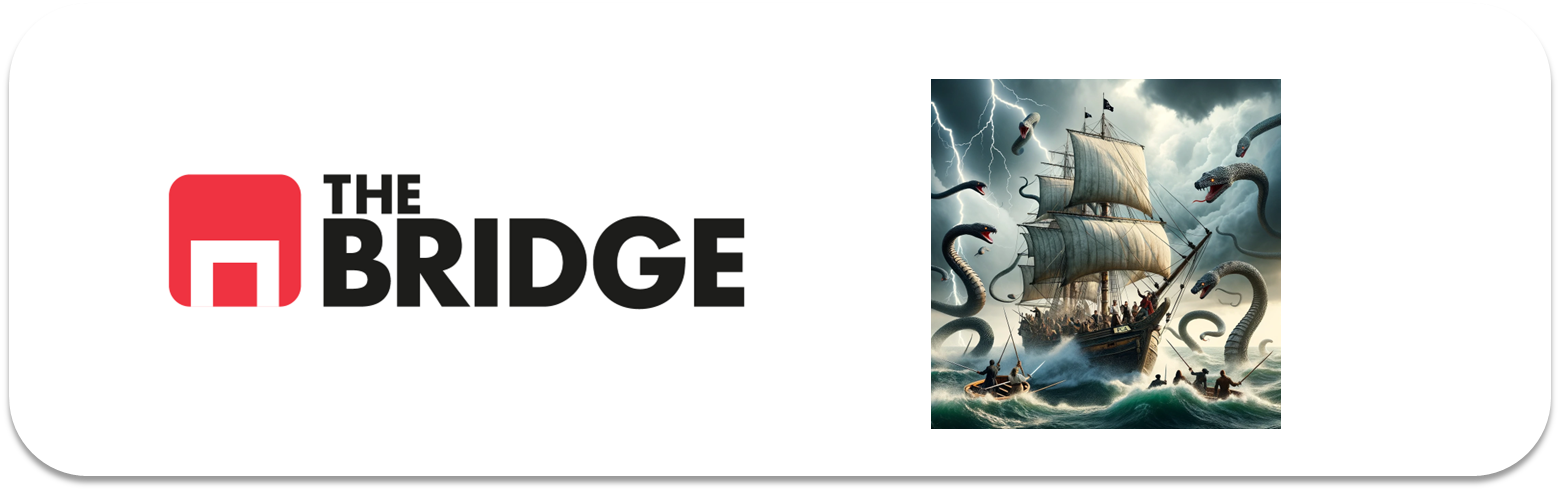

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import (SelectKBest, f_classif, mutual_info_classif, 
                                     SelectFromModel, RFE)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.tail(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
12527,0,0.197540,36,0,0.395104,3798.0,4,0,1,0,1.0
12528,0,1.000000,26,0,0.000000,NaN,0,0,0,0,NaN
12529,0,0.003882,57,0,7.000000,NaN,3,0,0,0,0.0
12530,0,0.021472,61,0,0.239872,9033.0,6,0,1,0,0.0
12531,0,0.503074,46,0,0.311012,4912.0,6,0,1,0,3.0
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0
12536,0,0.000000,40,0,0.455357,3583.0,7,0,2,0,1.0


In [25]:
print(f"Original dataset shape: {df.shape}")
print(f"Missing values per column:\n{df.isnull().sum()}")

Original dataset shape: (12537, 16)
Missing values per column:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                             721
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                        177
NumberOfTime30-59DaysPastDueNotWorse_b      0
NumberOfTimes90DaysLate_b                   0
NumberRealEstateLoansOrLines_b              0
NumberOfTime60-89DaysPastDueNotWorse_b      0
NumberOfDependents_b                        0
dtype: int64


In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [6]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64

In [7]:
df["NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
0     11839
1       412
2       147
3        55
4        33
98       21
5        14
6         6
7         4
8         3
10        1
9         1
13        1
Name: count, dtype: int64

In [8]:
df["NumberRealEstateLoansOrLines"].value_counts()

NumberRealEstateLoansOrLines
0     4947
1     4156
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
10       2
16       2
19       1
13       1
Name: count, dtype: int64

In [26]:
df_clean = df.dropna().copy()

def bin_manual(df, cols):
    df2 = df.copy()
    def cat(x):
        if x == 0: return "0"
        elif x <= 2: return "1-2"
        else: return "3+"
    
    for c in cols:
        df2[c+"_b"] = df2[c].apply(cat)
    return df2

cols_to_bin = [
    "NumberOfTime30-59DaysPastDueNotWorse", 
    "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines", 
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"
]

df_clean = bin_manual(df_clean, cols_to_bin)
categorical_cols = [col for col in df_clean.columns if "_b" in col]

In [27]:
categorical_cols

['NumberOfTime30-59DaysPastDueNotWorse_b',
 'NumberOfTimes90DaysLate_b',
 'NumberRealEstateLoansOrLines_b',
 'NumberOfTime60-89DaysPastDueNotWorse_b',
 'NumberOfDependents_b']

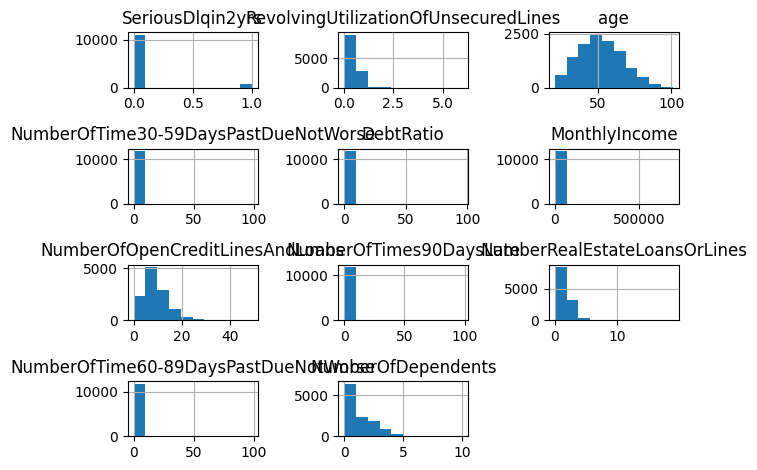

In [18]:
df_clean.hist()
plt.tight_layout()

In [19]:
df_clean.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.070244,0.335668,51.447698,0.340471,0.499708,6864.815420,8.759140,0.180010,1.059580,0.149712,0.856804
std,0.255568,0.365209,14.516270,2.927409,2.696067,11855.905437,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034927,41.000000,0.000000,0.143456,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179183,51.000000,0.000000,0.294748,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587187,62.000000,0.000000,0.477414,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


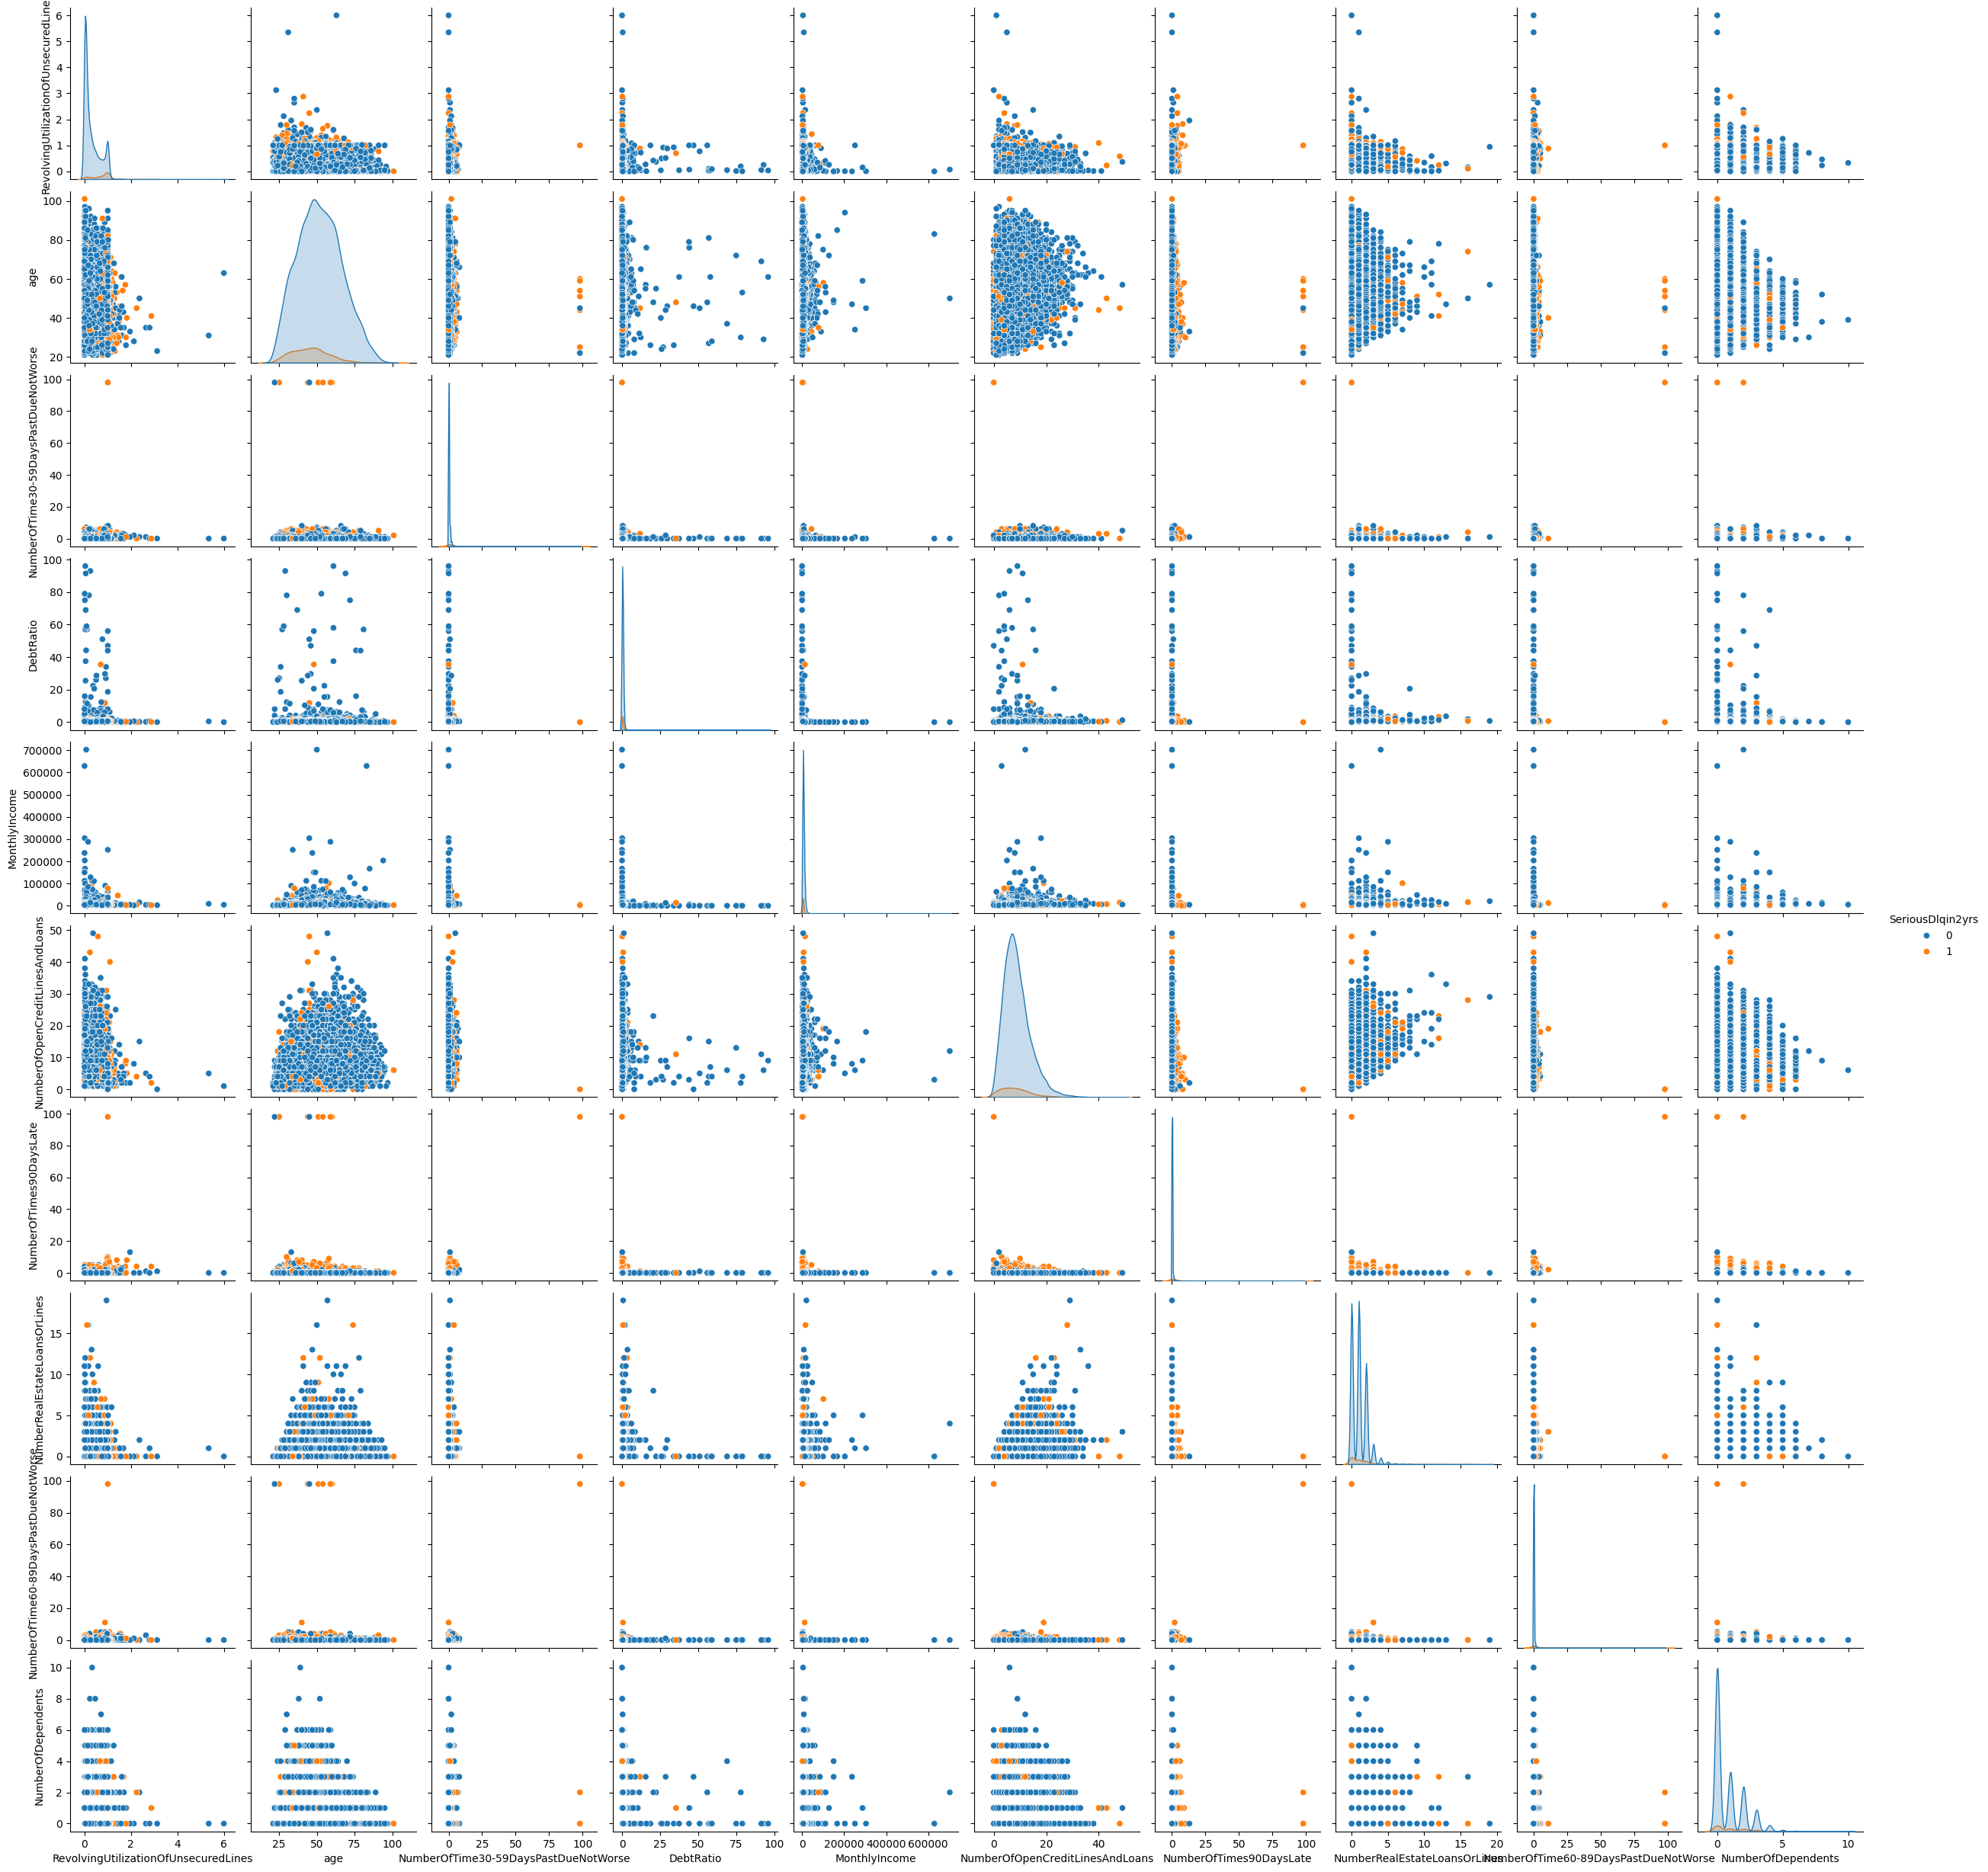

In [20]:
sns.pairplot(df_clean, hue = "SeriousDlqin2yrs")

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, make_scorer

In [28]:
features_to_drop = cols_to_bin + ['SeriousDlqin2yrs']
X = df_clean.drop(columns=features_to_drop)
y = df_clean['SeriousDlqin2yrs']


In [ ]:
# Encoding categorical features
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le


In [30]:
X.shape

(11816, 10)

In [31]:
y.value_counts()

SeriousDlqin2yrs
0    10986
1      830
Name: count, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)


In [36]:
numerical_cols = [col for col in X.columns if col not in categorical_cols]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [37]:
X_train_scaled.shape

(9452, 10)

In [39]:
X_test_scaled.shape

(2364, 10)

In [41]:
# Correlation analysis
corr_matrix = X_train_scaled.corr()
correlation_with_target = np.abs(X_train_scaled.corrwith(pd.Series(y_train, index=X_train_scaled.index)))

In [42]:

# Remove highly correlated features (threshold = 0.9)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

In [43]:
high_corr_pairs 

[]

In [44]:
# Covariance threshold
cov_matrix = X_train_scaled.cov()
low_var_features = [col for col in X_train_scaled.columns if cov_matrix.loc[col, col] < 0.01]
print(f"Low variance features: {low_var_features}")

Low variance features: []


In [45]:
features_to_drop = cols_to_bin + ['SeriousDlqin2yrs']
X = df_clean.drop(columns=features_to_drop)
y = df_clean['SeriousDlqin2yrs']


In [53]:
visual_features = correlation_with_target.nlargest(6).index.tolist()
print(f"Visual/Correlation features (top 6): {visual_features}")

Visual/Correlation features (top 6): ['NumberOfTimes90DaysLate_b', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime60-89DaysPastDueNotWorse_b', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'age', 'NumberOfDependents_b']


In [46]:
# ANOVA for numerical features
if numerical_cols:
    selector_anova = SelectKBest(score_func=f_classif, k=min(4, len(numerical_cols)))
    X_train_num_selected = selector_anova.fit_transform(X_train_scaled[numerical_cols], y_train)
    anova_features = [numerical_cols[i] for i in selector_anova.get_support(indices=True)]
else:
    anova_features = []

# Mutual Information for categorical features
if categorical_cols:
    selector_mi = SelectKBest(score_func=mutual_info_classif, k=min(2, len(categorical_cols)))
    X_train_cat_selected = selector_mi.fit_transform(X_train_scaled[categorical_cols], y_train)
    mi_features = [categorical_cols[i] for i in selector_mi.get_support(indices=True)]
else:
    mi_features = []

statistical_features = anova_features + mi_features
print(f"Statistical features (ANOVA + MI): {statistical_features}")

Statistical features (ANOVA + MI): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'NumberOfTimes90DaysLate_b']


In [47]:
# 2.3 SelectFromModel with intermediate model
print("\n2.3 SelectFromModel with intermediate model")

rf_intermediate = RandomForestClassifier(n_estimators=100, random_state=42)
selector_model = SelectFromModel(rf_intermediate, max_features=6)
selector_model.fit(X_train_scaled, y_train)
model_features = X_train_scaled.columns[selector_model.get_support()].tolist()
print(f"Model-based features: {model_features}")


2.3 SelectFromModel with intermediate model
Model-based features: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']


In [48]:
rf_rfe = RandomForestClassifier(n_estimators=50, random_state=42)
selector_rfe = RFE(rf_rfe, n_features_to_select=6)
selector_rfe.fit(X_train_scaled, y_train)
rfe_features = X_train_scaled.columns[selector_rfe.get_support()].tolist()
print(f"RFE features: {rfe_features}")

RFE features: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate_b']


In [51]:
lr_sfs = LogisticRegression(random_state=42, max_iter=1000)
sfs = SFS(lr_sfs, k_features=6, forward=True, floating=False, 
          scoring='recall', cv=3, n_jobs=-1)
sfs.fit(X_train_scaled, y_train)
sfs_features = list(sfs.k_feature_names_)
print(f"SFS features: {sfs_features}")

SFS features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'NumberOfTimes90DaysLate_b', 'NumberOfTime60-89DaysPastDueNotWorse_b']


In [54]:
all_feature_sets = [visual_features, statistical_features, model_features, rfe_features, sfs_features]
feature_votes = Counter()

for feature_set in all_feature_sets:
    for feature in feature_set:
        feature_votes[feature] += 1

# Select features with at least 2 votes, limit to 6
voting_features = [feature for feature, votes in feature_votes.most_common() if votes >= 2][:6]
print(f"Hard voting features: {voting_features}")

# Store all feature sets
feature_sets = {
    'visual': visual_features,
    'statistical': statistical_features,
    'model_based': model_features,
    'rfe': rfe_features,
    'sfs': sfs_features,
    'voting': voting_features
}

print("\n=== FEATURE SETS SUMMARY ===")
for name, features in feature_sets.items():
    print(f"{name}: {len(features)} features - {features}")

Hard voting features: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate_b', 'age', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'MonthlyIncome']

=== FEATURE SETS SUMMARY ===
visual: 6 features - ['NumberOfTimes90DaysLate_b', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime60-89DaysPastDueNotWorse_b', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'age', 'NumberOfDependents_b']
statistical: 6 features - ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'NumberOfTimes90DaysLate_b']
model_based: 5 features - ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']
rfe: 6 features - ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate_b']
sfs: 6 features - ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'Nu

In [55]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("Cross-validation results (Recall scores):")
print("-" * 60)

for model_name, model in models.items():
    results[model_name] = {}
    for feature_set_name, features in feature_sets.items():
        # Ensure features exist in training data
        valid_features = [f for f in features if f in X_train_scaled.columns]
        if not valid_features:
            continue
            
        X_train_subset = X_train_scaled[valid_features]
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_subset, y_train, 
                                  cv=cv, scoring='recall')
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        
        results[model_name][feature_set_name] = {
            'mean': mean_score,
            'std': std_score,
            'features': valid_features
        }
        
        print(f"{model_name:20} | {feature_set_name:12} | "
              f"Recall: {mean_score:.4f} ± {std_score:.4f}")

Cross-validation results (Recall scores):
------------------------------------------------------------
RandomForest         | visual       | Recall: 0.2034 ± 0.0430
RandomForest         | statistical  | Recall: 0.1944 ± 0.0397
RandomForest         | model_based  | Recall: 0.0512 ± 0.0088
RandomForest         | rfe          | Recall: 0.1944 ± 0.0392
RandomForest         | sfs          | Recall: 0.2155 ± 0.0500
RandomForest         | voting       | Recall: 0.1913 ± 0.0316
GradientBoosting     | visual       | Recall: 0.1778 ± 0.0407
GradientBoosting     | statistical  | Recall: 0.1958 ± 0.0362
GradientBoosting     | model_based  | Recall: 0.0392 ± 0.0240
GradientBoosting     | rfe          | Recall: 0.1823 ± 0.0279
GradientBoosting     | sfs          | Recall: 0.1974 ± 0.0446
GradientBoosting     | voting       | Recall: 0.1973 ± 0.0347
LogisticRegression   | visual       | Recall: 0.1763 ± 0.0371
LogisticRegression   | statistical  | Recall: 0.1733 ± 0.0395
LogisticRegression   | model_

In [56]:
best_score = 0
best_model_name = None
best_feature_set_name = None

for model_name, model_results in results.items():
    for feature_set_name, scores in model_results.items():
        if scores['mean'] > best_score:
            best_score = scores['mean']
            best_model_name = model_name
            best_feature_set_name = feature_set_name

print(f"\nBest combination:")
print(f"Model: {best_model_name}")
print(f"Feature set: {best_feature_set_name}")
print(f"Best CV Recall: {best_score:.4f}")
print(f"Best features: {results[best_model_name][best_feature_set_name]['features']}")


Best combination:
Model: RandomForest
Feature set: sfs
Best CV Recall: 0.2155
Best features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'NumberOfTimes90DaysLate_b', 'NumberOfTime60-89DaysPastDueNotWorse_b']


In [57]:
best_model = models[best_model_name]
best_features = results[best_model_name][best_feature_set_name]['features']

X_train_best = X_train_scaled[best_features]
X_test_best = X_test_scaled[best_features]

# Define hyperparameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
}


In [58]:

# Hyperparameter optimization
print(f"Optimizing hyperparameters for {best_model_name}...")
grid_search = GridSearchCV(
    best_model, 
    param_grids[best_model_name],
    cv=cv,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train_best, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Optimizing hyperparameters for RandomForest...
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.2185


In [59]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test_best)

# Calculate metrics
test_recall = recall_score(y_test, y_pred)
print(f"\nFinal Test Set Performance:")
print(f"Recall: {test_recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Final Test Set Performance:
Recall: 0.1928

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2198
           1       0.47      0.19      0.27       166

    accuracy                           0.93      2364
   macro avg       0.71      0.59      0.62      2364
weighted avg       0.91      0.93      0.91      2364


Confusion Matrix:
[[2162   36]
 [ 134   32]]


In [ ]:
#Muy bien para los que no son delinquents, pero falla en los que sí... que a o mejor es lo que quereos


Feature Importance:
                                  feature  importance
0    RevolvingUtilizationOfUnsecuredLines    0.327470
1                               DebtRatio    0.313920
2         NumberOfOpenCreditLinesAndLoans    0.136667
4               NumberOfTimes90DaysLate_b    0.126814
5  NumberOfTime60-89DaysPastDueNotWorse_b    0.049596
3  NumberOfTime30-59DaysPastDueNotWorse_b    0.045534


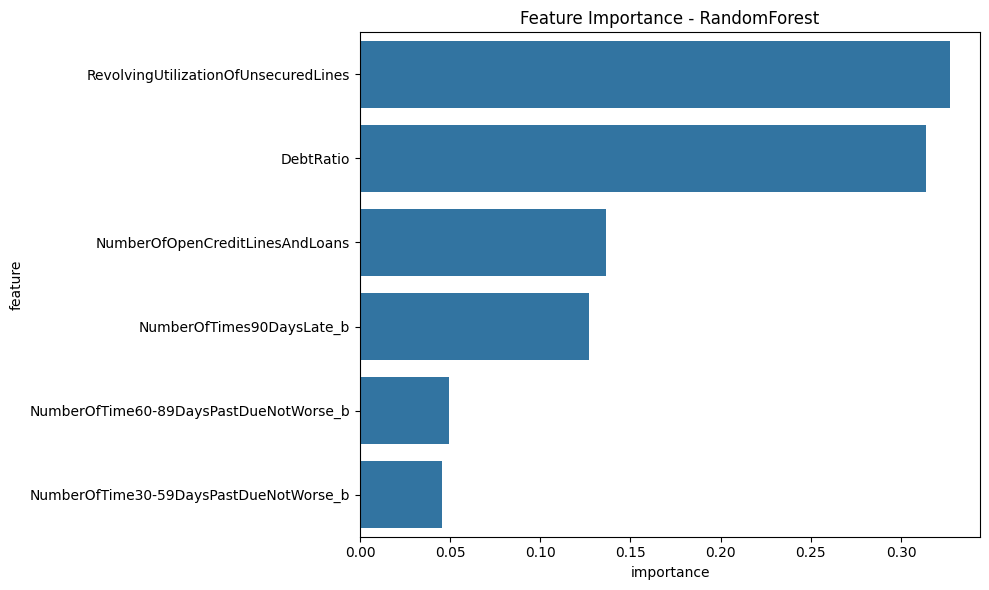

In [60]:

# Feature importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': best_features,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

In [61]:

print("\n=== EXERCISE COMPLETED ===")
print(f"Final model: {best_model_name}")
print(f"Selected features: {best_features}")
print(f"Test Recall: {test_recall:.4f}")


=== EXERCISE COMPLETED ===
Final model: RandomForest
Selected features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse_b', 'NumberOfTimes90DaysLate_b', 'NumberOfTime60-89DaysPastDueNotWorse_b']
Test Recall: 0.1928


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.